In [1]:
import pandas as pd
import os
from lxml import etree
%matplotlib inline

In [2]:
with open ('submittion.html', 'r') as fh:
    text=fh.read()
c = etree.HTML(text)
c

<Element html at 0x2b9f811a6a28>

In [3]:
# //*[@id="form"]/table/tbody/tr[1]/td[3]

In [4]:
t = c.xpath('//table')[0]

In [5]:
content = []
for i in t.xpath('//tr/td'):
    try:
        if i.text.startswith('0.'):
            a = float(i.text)
            content.append(a)
    except:
        pass
    if len(i.xpath('a')):
        b = i.xpath('a')[0].xpath('@href')[0].split('_us_')[-1]
        content.append(b)
        
    

In [6]:
content[:3]

[0.859571716932431, 'comb1.csv', 0.85226339885732]

In [7]:
len([i for i in content[1::2]])

31

In [8]:
len([i for i in content[::2]])

31

In [9]:
df = pd.DataFrame(zip ([i for i in content[1::2]], [i for i in content[::2]]), columns=['name','score'])
df.to_csv('submit_result.csv', index=False)

In [10]:
df = df.iloc[:-1,:]
df

,name,score
0,comb1.csv,0.859572
1,xgb_121_full.csv,0.852263
2,xgb_156.csv,0.855999
3,xgb_185.csv,0.859211
4,xgb_121_tune2.csv,0.855450
5,xgb_121_tune1.csv,0.858539
6,xgb_115.csv,0.857331
7,xgb_88.csv,0.859878
8,xgb_121.csv,0.861111
9,xgb_129.csv,0.856124


In [11]:
df_s = df.copy()
df_s

,name,score
0,comb1.csv,0.859572
1,xgb_121_full.csv,0.852263
2,xgb_156.csv,0.855999
3,xgb_185.csv,0.859211
4,xgb_121_tune2.csv,0.855450
5,xgb_121_tune1.csv,0.858539
6,xgb_115.csv,0.857331
7,xgb_88.csv,0.859878
8,xgb_121.csv,0.861111
9,xgb_129.csv,0.856124


In [12]:
df_s = df_s.set_index('name')
df_s

,score
name,
comb1.csv,0.859572
xgb_121_full.csv,0.852263
xgb_156.csv,0.855999
xgb_185.csv,0.859211
xgb_121_tune2.csv,0.855450
xgb_121_tune1.csv,0.858539
xgb_115.csv,0.857331
xgb_88.csv,0.859878
xgb_121.csv,0.861111


In [13]:
files = os.listdir('submit/')
files.remove('fr200.csv')
cont = [pd.read_csv('submit/'+i, names=[i+'_ID', i]) for i in files]
print len(cont)
df = pd.concat(cont, axis=1)
print df.shape
df = df.iloc[1:,:]
ID = df.pop('xgb_110.csv_ID')
print ID.shape
df.shape

for i in df:
    if i.endswith('ID'):
        df.pop(i)
        
for i in df:
    df[i]=df[i].astype('float')
print df.shape
df.head()        

29
(30038, 58)
(30037,)
(30037, 29)


,xgb_110.csv,xgb_121.csv,xgb_128.csv,xgb2_full.csv,fr600.t5_f.csv,xgb_rm.csv,xgb_rm2.csv,xgb_115.csv,xgb_156.csv,xgb_121_full.csv,...,xgb_88.csv,xgb-ext-date.csv,xgb1.csv,xgb_185.csv,xgb_rm996_23333.csv,xgb_factor2.csv,xgb_85.csv,xgb_106.csv,xgb_121_tune1.csv,xgb_rm_rd.csv
1,0.010564,0.013017,0.014291,0.014090,0.000556,0.058538,0.012459,0.014536,0.012841,0.011588,...,0.014744,0.036651,0.015473,0.010602,0.023680,0.014747,0.014395,0.014347,0.016210,0.013017
2,0.015405,0.012285,0.024970,0.008727,0.032749,0.068569,0.004747,0.013840,0.013678,0.006912,...,0.014216,0.021775,0.012685,0.011178,0.004059,0.017964,0.015670,0.015747,0.014895,0.012285
3,0.001158,0.000658,0.004558,0.000661,0.003083,0.046141,0.000116,0.001359,0.001808,0.000199,...,0.001584,0.000618,0.000708,0.001116,0.000142,0.000495,0.001601,0.001744,0.000817,0.000658
4,0.001261,0.000643,0.004479,0.000735,0.005123,0.046141,0.000125,0.001300,0.001848,0.000177,...,0.001543,0.000536,0.000512,0.001059,0.000125,0.000411,0.001673,0.001678,0.000780,0.000643
5,0.003408,0.003275,0.007844,0.004112,0.001958,0.049115,0.001552,0.004672,0.005258,0.002280,...,0.004310,0.005866,0.003146,0.004054,0.001975,0.005350,0.004790,0.004770,0.004183,0.003275


In [14]:
df_pred = df.transpose().join(df_s)
df_pred

,1,2,3,4,5,6,7,8,9,10,...,30029,30030,30031,30032,30033,30034,30035,30036,30037,score
xgb_110.csv,0.010564,0.015405,0.001158,0.001261,0.003408,0.001331,0.032851,0.003302,0.011671,0.053386,...,0.001183,0.001210,0.001234,0.005702,0.001465,0.002664,0.001357,0.014325,0.008531,0.856321
xgb_121.csv,0.013017,0.012285,0.000658,0.000643,0.003275,0.000693,0.031320,0.002719,0.011533,0.041218,...,0.000702,0.000649,0.000778,0.003671,0.000995,0.002225,0.000823,0.016174,0.006884,0.861111
xgb_128.csv,0.014291,0.024970,0.004558,0.004479,0.007844,0.004726,0.038058,0.006682,0.017150,0.051000,...,0.004445,0.004493,0.004492,0.011743,0.004629,0.005496,0.005191,0.021682,0.010385,0.853088
xgb2_full.csv,0.014090,0.008727,0.000661,0.000735,0.004112,0.000731,0.023366,0.003303,0.007802,0.075863,...,0.000714,0.000638,0.000680,0.004125,0.000903,0.002116,0.000990,0.031070,0.007317,0.852538
fr600.t5_f.csv,0.000556,0.032749,0.003083,0.005123,0.001958,0.002083,0.021101,0.004083,0.011526,0.033231,...,0.000417,0.002639,0.000000,0.011094,0.006903,0.002972,0.000000,0.001639,0.040716,0.820411
xgb_rm.csv,0.058538,0.068569,0.046141,0.046141,0.049115,0.046141,0.071481,0.048342,0.059827,0.095292,...,0.046141,0.046141,0.046141,0.049732,0.046201,0.046405,0.046141,0.062950,0.051453,0.840077
xgb_rm2.csv,0.012459,0.004747,0.000116,0.000125,0.001552,0.000157,0.012721,0.001233,0.004434,0.031246,...,0.000155,0.000120,0.000182,0.002215,0.000305,0.001225,0.000179,0.009919,0.003436,0.852388
xgb_115.csv,0.014536,0.013840,0.001359,0.001300,0.004672,0.001414,0.025906,0.003885,0.012858,0.060680,...,0.001285,0.001349,0.001366,0.005471,0.001592,0.002569,0.001406,0.014807,0.009289,0.857331
xgb_156.csv,0.012841,0.013678,0.001808,0.001848,0.005258,0.001935,0.030523,0.004257,0.015062,0.058525,...,0.001760,0.001873,0.001903,0.006892,0.002132,0.003039,0.002131,0.012758,0.009208,0.855999
xgb_121_full.csv,0.011588,0.006912,0.000199,0.000177,0.002280,0.000257,0.015689,0.002498,0.007161,0.048083,...,0.000260,0.000202,0.000270,0.003489,0.000388,0.001425,0.000285,0.017541,0.009023,0.852263


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
s = MinMaxScaler()

In [17]:
r = s.fit_transform(df_pred['score'].values.reshape(-1,1))
r

array([[0.90109386],
       [1.        ],
       [0.83433264],
       [0.82297788],
       [0.1595526 ],
       [0.56564867],
       [0.81986955],
       [0.92195197],
       [0.89443557],
       [0.81730475],
       [0.89703434],
       [0.86827802],
       [0.17391378],
       [0.        ],
       [0.41184564],
       [0.77817033],
       [0.36449876],
       [0.84699528],
       [0.88310629],
       [0.97453885],
       [0.42286918],
       [0.82396304],
       [0.96076366],
       [0.88480484],
       [0.60350919],
       [0.90019363],
       [0.97282332],
       [0.94688657],
       [1.        ]])

In [18]:
df_pred.values[:,:-1].shape

(29, 30037)

In [19]:
X = df_pred.values[:,:-1]
y = df_pred.values[:,-1]

In [20]:
X.shape

(29, 30037)

In [21]:
r.shape

(29, 1)

In [22]:
import numpy as np

In [23]:
r.T

array([[0.90109386, 1.        , 0.83433264, 0.82297788, 0.1595526 ,
        0.56564867, 0.81986955, 0.92195197, 0.89443557, 0.81730475,
        0.89703434, 0.86827802, 0.17391378, 0.        , 0.41184564,
        0.77817033, 0.36449876, 0.84699528, 0.88310629, 0.97453885,
        0.42286918, 0.82396304, 0.96076366, 0.88480484, 0.60350919,
        0.90019363, 0.97282332, 0.94688657, 1.        ]])

In [24]:
new_result = np.dot(r.T, X)
new_result

array([[0.33659732, 0.32547294, 0.05116136, ..., 0.05248747, 0.36824002,
        0.2264013 ]])

In [25]:
new_result.shape

(1, 30037)

In [26]:
new_result[0].shape

(30037,)

In [27]:
ID.shape

(30037,)

In [28]:
# pd.Series(new_result[0])

In [29]:
# pd.Series(ID)

In [30]:
df7 = pd.DataFrame(list(pd.Series(new_result[0]).values), list(pd.Series(ID).values)).reset_index()
df7.head()

,index,0
0,APPA70109647212,0.336597
1,APPB10687939341,0.325473
2,APPC80449411414,0.051161
3,APPD30665094501,0.053259
4,APPE80379821637,0.112305


In [31]:
df7.columns=[['ID','Approved']]
df7.head()

,ID,Approved
0,APPA70109647212,0.336597
1,APPB10687939341,0.325473
2,APPC80449411414,0.051161
3,APPD30665094501,0.053259
4,APPE80379821637,0.112305


In [32]:
# df7.to_csv('submit_comb.csv', index=False)

In [33]:
df_pred

,1,2,3,4,5,6,7,8,9,10,...,30029,30030,30031,30032,30033,30034,30035,30036,30037,score
xgb_110.csv,0.010564,0.015405,0.001158,0.001261,0.003408,0.001331,0.032851,0.003302,0.011671,0.053386,...,0.001183,0.001210,0.001234,0.005702,0.001465,0.002664,0.001357,0.014325,0.008531,0.856321
xgb_121.csv,0.013017,0.012285,0.000658,0.000643,0.003275,0.000693,0.031320,0.002719,0.011533,0.041218,...,0.000702,0.000649,0.000778,0.003671,0.000995,0.002225,0.000823,0.016174,0.006884,0.861111
xgb_128.csv,0.014291,0.024970,0.004558,0.004479,0.007844,0.004726,0.038058,0.006682,0.017150,0.051000,...,0.004445,0.004493,0.004492,0.011743,0.004629,0.005496,0.005191,0.021682,0.010385,0.853088
xgb2_full.csv,0.014090,0.008727,0.000661,0.000735,0.004112,0.000731,0.023366,0.003303,0.007802,0.075863,...,0.000714,0.000638,0.000680,0.004125,0.000903,0.002116,0.000990,0.031070,0.007317,0.852538
fr600.t5_f.csv,0.000556,0.032749,0.003083,0.005123,0.001958,0.002083,0.021101,0.004083,0.011526,0.033231,...,0.000417,0.002639,0.000000,0.011094,0.006903,0.002972,0.000000,0.001639,0.040716,0.820411
xgb_rm.csv,0.058538,0.068569,0.046141,0.046141,0.049115,0.046141,0.071481,0.048342,0.059827,0.095292,...,0.046141,0.046141,0.046141,0.049732,0.046201,0.046405,0.046141,0.062950,0.051453,0.840077
xgb_rm2.csv,0.012459,0.004747,0.000116,0.000125,0.001552,0.000157,0.012721,0.001233,0.004434,0.031246,...,0.000155,0.000120,0.000182,0.002215,0.000305,0.001225,0.000179,0.009919,0.003436,0.852388
xgb_115.csv,0.014536,0.013840,0.001359,0.001300,0.004672,0.001414,0.025906,0.003885,0.012858,0.060680,...,0.001285,0.001349,0.001366,0.005471,0.001592,0.002569,0.001406,0.014807,0.009289,0.857331
xgb_156.csv,0.012841,0.013678,0.001808,0.001848,0.005258,0.001935,0.030523,0.004257,0.015062,0.058525,...,0.001760,0.001873,0.001903,0.006892,0.002132,0.003039,0.002131,0.012758,0.009208,0.855999
xgb_121_full.csv,0.011588,0.006912,0.000199,0.000177,0.002280,0.000257,0.015689,0.002498,0.007161,0.048083,...,0.000260,0.000202,0.000270,0.003489,0.000388,0.001425,0.000285,0.017541,0.009023,0.852263


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
X.shape, y.shape

((29, 30037), (29,))

In [37]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
import matplotlib.pyplot as plt

In [39]:
lr.coef_

array([-2.51442830e-03,  1.02204827e-03,  2.08584877e-03, ...,
        2.18686853e-05,  9.64615191e-05, -2.79619314e-04])

In [40]:
import matplotlib.pyplot as plt

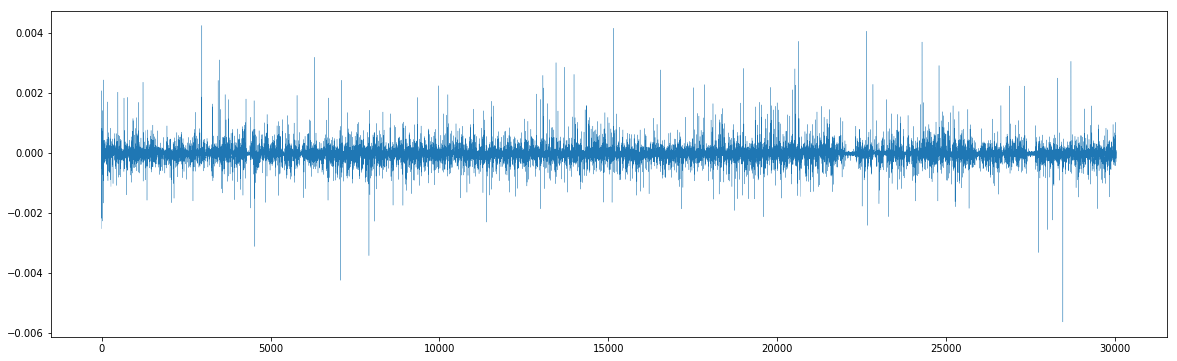

In [41]:
plt.figure(figsize=[20,6])
plt.plot(lr.coef_, linewidth=0.3)

In [81]:
m = MinMaxScaler()
cf = m.fit_transform(lr.coef_.reshape(-1,1))

In [82]:
cf.shape

(30037, 1)

In [83]:
cf

array([[0.3146221 ],
       [0.67239927],
       [0.78002151],
       ...,
       [0.57121341],
       [0.57875979],
       [0.54071256]])

In [84]:
new_result = np.dot(r.T, X)
new_result

array([[0.33659732, 0.32547294, 0.05116136, ..., 0.05248747, 0.36824002,
        0.2264013 ]])

In [85]:
new_result.shape

(1, 30037)

In [86]:
new_result.T.shape

(30037, 1)

In [87]:
new_result.T

array([[0.33659732],
       [0.32547294],
       [0.05116136],
       ...,
       [0.05248747],
       [0.36824002],
       [0.2264013 ]])

In [88]:
new_result.T*cf

array([[0.10590096],
       [0.21884777],
       [0.03990696],
       ...,
       [0.02998154],
       [0.21312252],
       [0.12241803]])

In [89]:
(new_result.T*cf).shape

(30037, 1)

In [90]:
cf

array([[0.3146221 ],
       [0.67239927],
       [0.78002151],
       ...,
       [0.57121341],
       [0.57875979],
       [0.54071256]])

In [91]:
np.dot(new_result.T, cf).shape

ValueError: shapes (30037,1) and (30037,1) not aligned: 1 (dim 1) != 30037 (dim 0)

In [92]:
df7

,ID,Approved
0,APPA70109647212,0.336597
1,APPB10687939341,0.325473
2,APPC80449411414,0.051161
3,APPD30665094501,0.053259
4,APPE80379821637,0.112305
5,APPF90611935733,0.051349
6,APPG20993415813,0.617343
7,APPH30656456927,0.105032
8,APPI70297912043,0.281715
9,APPJ50119937105,1.129259


In [93]:
lr_t = new_result.T*cf
lr_t

array([[0.10590096],
       [0.21884777],
       [0.03990696],
       ...,
       [0.02998154],
       [0.21312252],
       [0.12241803]])

In [94]:
pd.DataFrame(MinMaxScaler().fit_transform(lr_t)).iloc[:,0].describe()

count    30037.000000
mean         0.019710
std          0.032376
min          0.000000
25%          0.003660
50%          0.008874
75%          0.022383
max          1.000000
Name: 0, dtype: float64

In [95]:
lr_t.flatten()

array([0.10590096, 0.21884777, 0.03990696, ..., 0.02998154, 0.21312252,
       0.12241803])

In [96]:
lr_t[0]

array([0.10590096])

In [97]:
df9 = pd.DataFrame(list(pd.Series(lr_t.flatten()).values), list(pd.Series(ID).values)).reset_index()
df9.head()

,index,0
0,APPA70109647212,0.105901
1,APPB10687939341,0.218848
2,APPC80449411414,0.039907
3,APPD30665094501,0.030919
4,APPE80379821637,0.075864


In [59]:
df9.columns=[['ID','Approved']]
df9.head()

,ID,Approved
0,APPA70109647212,-3.413525
1,APPB10687939341,1.349255
2,APPC80449411414,0.431961
3,APPD30665094501,0.025436
4,APPE80379821637,0.479572


In [60]:
df9.to_csv('comb_linr2.csv', index=False)

In [61]:
x1 = pd.read_csv('./submit/xgb_121.csv')
x1.head()

,ID,Approved
0,APPA70109647212,0.013017
1,APPB10687939341,0.012285
2,APPC80449411414,0.000658
3,APPD30665094501,0.000643
4,APPE80379821637,0.003275


In [62]:
x1['Approved'].values

array([0.01301735, 0.01228481, 0.00065763, ..., 0.00082283, 0.01617368,
       0.00688406])

In [63]:
cf.shape

(30037, 1)

In [64]:
new_result.shape

(1, 30037)

In [65]:
x1['Approved'].values.shape

(30037,)

In [66]:
x1['Approved'].values.reshape(-1,1).shape

(30037, 1)

In [67]:
new_result.T.shape

(30037, 1)

In [68]:
new121 = x1['Approved'].values.reshape(-1,1)*cf
new121.shape

(30037, 1)

In [69]:
lr.coef_

array([-2.51442830e-03,  1.02204827e-03,  2.08584877e-03, ...,
        2.18686853e-05,  9.64615191e-05, -2.79619314e-04])

In [71]:
nnn = MinMaxScaler()
new1212 = nnn.fit_transform(new121)
new1212

array([[0.36544556],
       [0.37660917],
       [0.37384025],
       ...,
       [0.3735067 ],
       [0.37390243],
       [0.37303386]])

In [74]:
pd.Series(new1212.flatten()).describe()

count    30037.000000
mean         0.373721
std          0.008876
min          0.000000
25%          0.373448
50%          0.373503
75%          0.373535
max          1.000000
dtype: float64

In [72]:
df11 = pd.DataFrame(list(pd.Series(new1212.flatten()).values), list(pd.Series(ID).values)).reset_index()
df11.head()

,index,0
0,APPA70109647212,0.365446
1,APPB10687939341,0.376609
2,APPC80449411414,0.373840
3,APPD30665094501,0.373520
4,APPE80379821637,0.374355


In [121]:
df11.shape

(30037, 2)

In [122]:
df11.columns=[['ID','Approved']]
df11.head()

,ID,Approved
0,APPA70109647212,0.006872
1,APPB10687939341,0.013861
2,APPC80449411414,0.000861
3,APPD30665094501,0.000627
4,APPE80379821637,0.003713


In [123]:
df11.to_csv('new121_clf_MN.csv', index=False)